<a href="https://colab.research.google.com/github/hafizhabdurrahman/CreditCardFraudDetection/blob/main/Tesis_Fraud_Model_Utama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/creditcard.csv')

In [ ]:
# Install required libraries
!pip install -U kaleido
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 13.7 MB/s eta 0:00:00


Note:
- Kaleido merupakan library yang dipakai untuk membuat grafik. Plotly merupakan bagian dari kaleido


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from imblearn.over_sampling import SVMSMOTE 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV
import time


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve
from imblearn.metrics import geometric_mean_score
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [ ]:
import numpy as np
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#df.describe()

In [ ]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

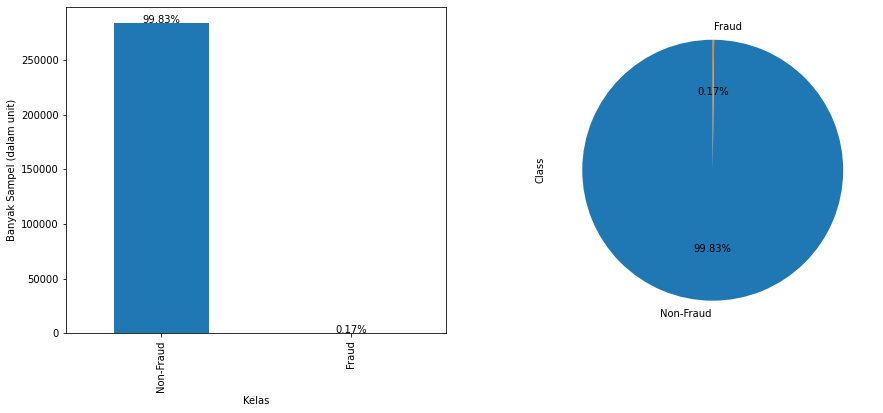

In [ ]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(121)
#plt.title('Jumlah Dataset', fontweight='bold',fontsize=14)
count_of_classes = pd.value_counts(df.Class, sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar')
plt.xlabel("Kelas")
plt.ylabel("Banyak Sampel (dalam unit)")
plt.xticks([0,1],["Non-Fraud","Fraud"])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f}%'.format(height*100/total),
        ha="center") 


plt.subplot(122)
labels = 'Non-Fraud', 'Fraud'
df.Class.value_counts().plot.pie(autopct = "%1.2f%%", labels=labels, startangle=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


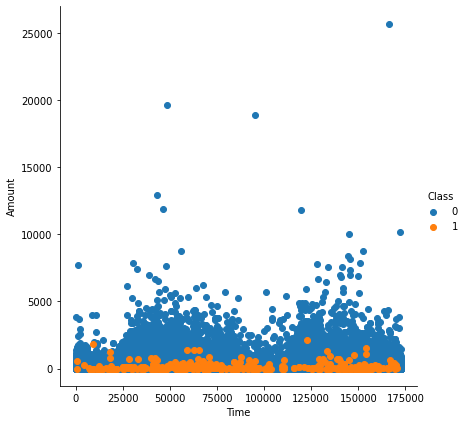

In [ ]:
import seaborn as sns

sns.FacetGrid(df, hue="Class", size=6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

- It can be seen that fraudulent transactions generally do not exceed the amount of 2500
- In addition, that fraudulent transactions are distributed evenly over time

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

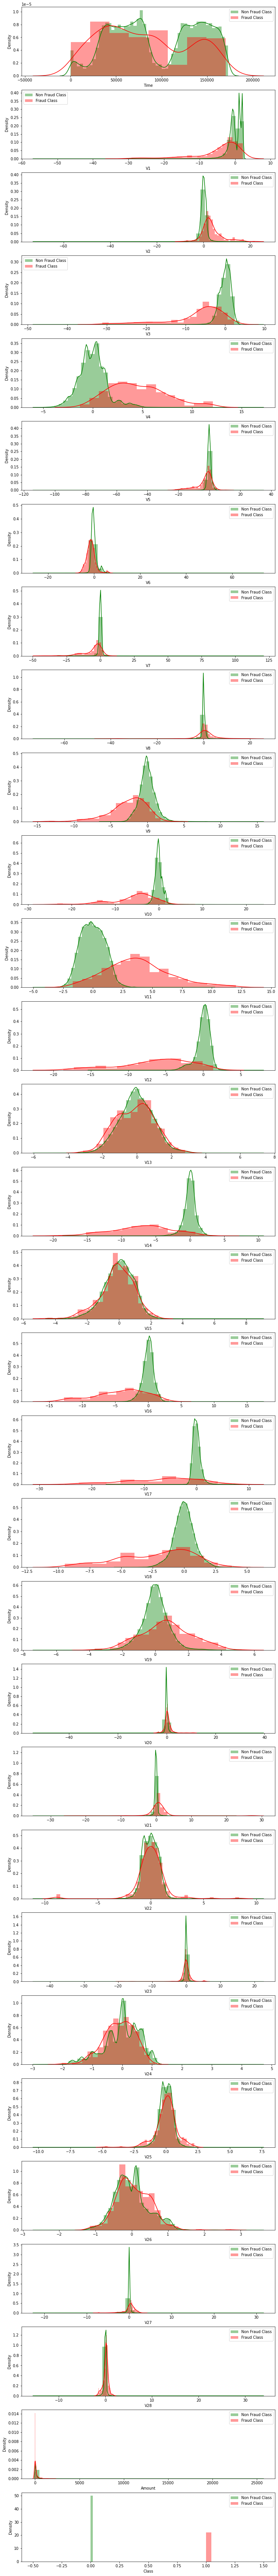

In [ ]:
# Cek distribusi fraud dan non-fraud pada tiap fitur
import matplotlib.gridspec as gridspec

v_features = df.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df['Class']==0],color='g',label='Non Fraud Class')
    sns.distplot(df[col][df['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

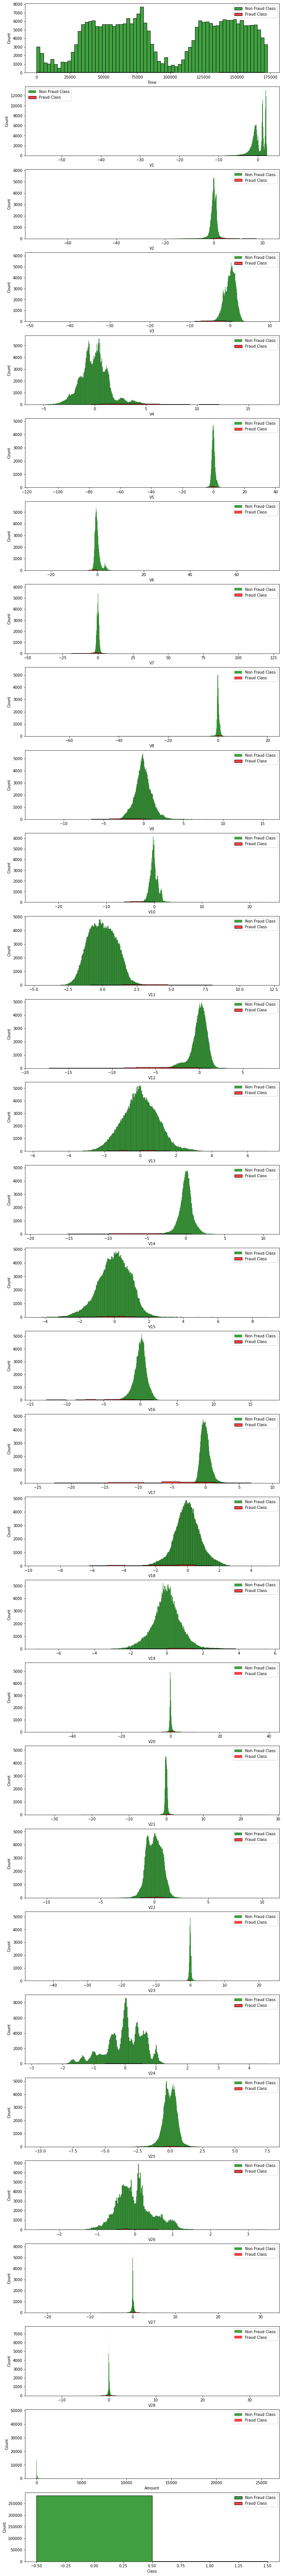

In [ ]:
v_features = df.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.histplot(df[col][df['Class']==0],color='g',label='Non Fraud Class')
    sns.histplot(df[col][df['Class']==1],color='r',label='Fraud Class')
    ax.legend()
plt.show()

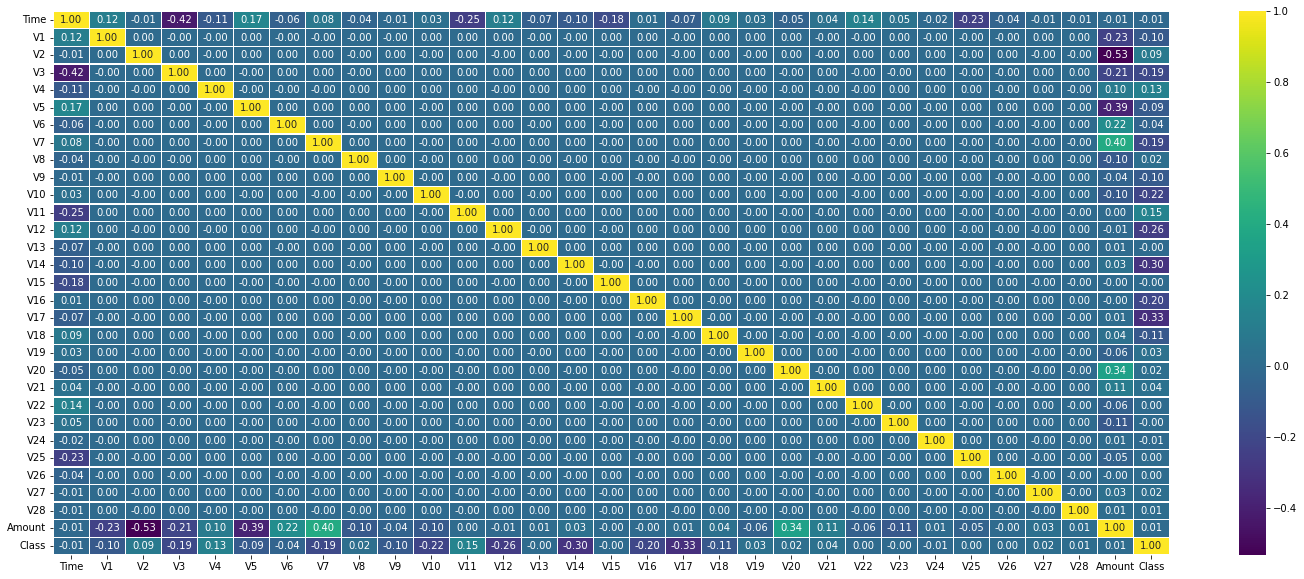

In [ ]:
# Korelasi antar variabel
corr1 = df.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr1, cmap='viridis', annot = True, linewidths= 0.5, fmt = '.2f')
#ax.set_title('Korelasi Antar Variabel', fontsize=30)
plt.show()

- Positive correlation: The higher the feature value, the more likely it will be a fraudulent transaction
- Negative correlation: The lower the feature value, the less likely it will be a fraudulent transaction

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']
#Split data train dan test 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

print('X_train shape =', X_train.shape)
print('y_train shape =', y_train.shape)
print('X_test shape =', X_test.shape)
print('y_test shape =', y_test.shape)

X_train shape = (85442, 30)
y_train shape = (85442,)
X_test shape = (199365, 30)
y_test shape = (199365,)




---



---



---



In [ ]:
from imblearn.over_sampling import SVMSMOTE 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import time

over = SVMSMOTE(sampling_strategy=0.1, random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=0)

# Oversampling
start = time.time()
X_over, y_over = over.fit_resample(X_train, y_train)
stop = time.time()
print(f"Oversampled: {Counter(y_over)}")
print(f"Oversampling time: {stop - start}s")

# Undersampling
start = time.time()
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
stop = time.time()
print(f"Combined Sampling: {Counter(y_combined_sampling)}")
print(f"Undersampling time: {stop - start}s")

df_combined = X_combined_sampling.copy()
df_combined['Class'] = y_combined_sampling

Oversampled: Counter({0: 85287, 1: 5155})
Oversampling time: 2.711838960647583s
Combined Sampling: Counter({0: 10310, 1: 5155})
Undersampling time: 0.05590081214904785s


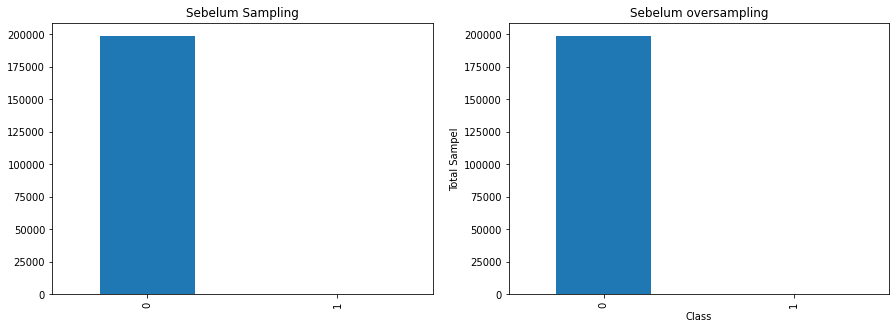

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Sebelum Sampling')
plt.xlabel("Class")
plt.ylabel("Total Sampel")
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('Sesudah oversampling')
pd.Series(y_over).value_counts().plot.bar(ax=ax2)
plt.show()

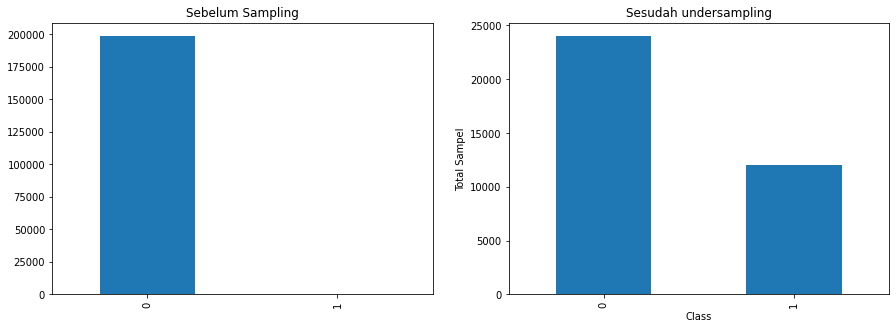

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Sebelum Sampling')
plt.xlabel("Class")
plt.ylabel("Total Sampel")
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('Sesudah undersampling')
pd.Series(y_combined_sampling).value_counts().plot.bar(ax=ax2)
plt.show()

Note:
- Cek apakah data sudah diacak lagi

In [ ]:
# Save X_train, y_train, X_test, y_test, X_combined_sampling, y_combined_sampling ke Drive
np.save(f"/content/drive/MyDrive/X_combined_sampling_utama.npy", X_combined_sampling)
np.save(f"/content/drive/MyDrive/y_combined_sampling_utama.npy", y_combined_sampling)
np.save(f"/content/drive/MyDrive/X_train_utama.npy", X_train)
np.save(f"/content/drive/MyDrive/y_train_utama.npy", y_train)
np.save(f"/content/drive/MyDrive/X_test_utama.npy", X_test)
np.save(f"/content/drive/MyDrive/y_test_utama.npy", y_test)

In [ ]:
from pickle import load

X_combined_sampling = np.load(f'/content/drive/MyDrive/X_combined_sampling_utama.npy', allow_pickle=True)
y_combined_sampling = np.load(f'/content/drive/MyDrive/y_combined_sampling_utama.npy', allow_pickle=True)
X_test = np.load(f'/content/drive/MyDrive/X_test_utama.npy', allow_pickle=True)
y_test = np.load(f'/content/drive/MyDrive/y_test_utama.npy', allow_pickle=True)
X_train = np.load(f'/content/drive/MyDrive/X_train_utama.npy', allow_pickle=True)
y_train = np.load(f'/content/drive/MyDrive/y_train_utama.npy', allow_pickle=True)

X = df.drop(['Class'], axis=1)
y = df['Class']

# Ubah data ke dalam bentuk Dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_combined_sampling = pd.DataFrame(X_combined_sampling, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_combined_sampling = pd.DataFrame(y_combined_sampling)

In [ ]:
y_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
85438,0
85439,0
85440,0
85441,0


In [ ]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
1,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
2,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
3,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
4,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,136954.0,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,...,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220,29.95
85439,159780.0,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,...,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714,533.05
85440,55911.0,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,...,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339,57.00
85441,38895.0,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,...,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419,7.15


In [ ]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
85438,0
85439,0
85440,0
85441,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV
import time

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV
import time
rfc = RandomForestClassifier(random_state = 0)
         
Featureselector = GeneticSelectionCV(rfc,
                                     cv=10,
                                     verbose=1,
                                     scoring="accuracy", 
                                     max_features=30,
                                     n_population=20,
                                     crossover_proba=0.05,
                                     mutation_proba=0.001,
                                     n_generations=50,
                                     crossover_independent_proba=0.5,
                                     mutation_independent_proba=0.05,
                                     tournament_size=3,
                                     n_gen_no_change=10,
                                     caching=True,
                                     n_jobs=-1)

start = time.time()
FeatureselectorModel = Featureselector.fit(X_combined_sampling,y_combined_sampling)
stop = time.time()
print('\n')
print('Feature Selection:', X.columns[Featureselector.support_])
print('\n')
print(f"Testing time: {stop - start}s")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.996914  15.6        0.005601]	[ 0.001716  7.505998  0.001489]	[ 0.992265  4.        0.004165]	[  0.998087  29.         0.00955 ]
1  	0     	[  0.997896  21.1        0.004587]	[ 0.000305  6.898551  0.000312]	[ 0.996673  6.        0.004165]	[  0.998087  29.         0.005561]
2  	2     	[  0.998065  24.7        0.004372]	[ 0.000027  6.356886  0.000138]	[  0.998032  15.         0.004165]	[  0.998087  29.         0.004526]
3  	0     	[  0.998081  27.6        0.004422]	[ 0.000017  4.2       0.000086]	[  0.998032  15.         0.004165]	[  0.998087  29.         0.00445 ]
4  	4     	[  0.998087  29.         0.00445 ]	[ 0.  0.  0.]                  	[  0.998087  29.         0.00445 ]	[  0.998087  29.         0.00445 ]
5  	0     	[  0.998087  29.         0.00445 ]	[ 0.  0.  0.]                  	

In [ ]:
rfc = RandomForestClassifier(random_state = 0)
         
Featureselector = GeneticSelectionCV(rfc,
                                     cv=10,
                                     verbose=1,
                                     scoring="accuracy", 
                                     max_features=30,
                                     n_population=20,
                                     crossover_proba=0.05,
                                     mutation_proba=0.001,
                                     n_generations=50,
                                     crossover_independent_proba=0.5,
                                     mutation_independent_proba=0.05,
                                     tournament_size=3,
                                     n_gen_no_change=10,
                                     caching=True,
                                     n_jobs=-1)

start = time.time()
FeatureselectorModel = Featureselector.fit(X_combined_sampling,y_combined_sampling)
stop = time.time()
print('\n')
print('Feature Selection:', X.columns[Featureselector.support_])
print('\n')
print(f"Testing time: {stop - start}s")

In [ ]:
#MODEL 1: Oversampling, Undersampling, dan Random Forest default parameter
import time
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve
from imblearn.metrics import geometric_mean_score
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go

#Sesuaikan fitur dengan hasil GA
#X_combined_sampling = X_combined_sampling[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#        'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'Amount']]
#X_test = X_test[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#       'V21', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28', 'Amount']]

def train_baseline_classifier(X,y):
    start = time.time()
    model = RandomForestClassifier(random_state = 0)
    
    model = model.fit(X, y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    return model



In [ ]:
def run_sampling_fs_RF(training_x, testing_x, training_y, testing_y):
    # Training Model
    model = train_baseline_classifier(training_x,training_y)
    start = time.time()
    # Prediksi
    predictions = model.predict(testing_x)
    # Probabilitas Prediksi
    probabilities = model.predict_proba(testing_x)
    stop = time.time()
    print(f"Testing time: {stop - start}s")

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)

    x = ["Non Fraud (pred)","Fraud (pred)"]
    y = ["Non Fraud (true)","Fraud (true)"]

    # Change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in conf_matrix]

    # Set up figure 
    fig1 = ff.create_annotated_heatmap(z=conf_matrix, x=x, y=y, annotation_text=z_text, colorscale='Blues')

    # Classification Report
    target_names = ['Non Fraud', 'Fraud']
    report = classification_report(testing_y, predictions,
                                   target_names=target_names, 
                                   digits=4)

    # Metrik    
    Accuracy  =  accuracy_score(testing_y, predictions)
    Precision =  precision_score(testing_y, predictions, labels=[1])
    Recall    =  recall_score(testing_y, predictions, labels=[1])
    F1_score  =  f1_score(testing_y, predictions, labels=[1])

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T #transpose

    print('Model:', type(model).__name__)
    print('\n')
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    # ROC
    model_roc_auc = roc_auc_score(testing_y, probabilities[:,1])
    print("AUC Score:", model_roc_auc)
    model_gmean = geometric_mean_score(testing_y, predictions)
    print("G-Mean Score:", model_gmean)
    print("F1 Score:", F1_score)
    print('\n')
    print('Classification Report : \n', report)

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                    orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-Recall
    precision, recall, thresholds = precision_recall_curve(testing_y, probabilities[:,1])
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    
    # Feature Importance
    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data   = pd.DataFrame(training_x.columns.tolist())
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    
    # Subplots
    fig = make_subplots(rows=4, cols=2, print_grid=False, 
                        specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Feature importance',
                                        ))
    
    fig.append_trace(fig1.data[0],1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,3,1)
    
    annot1 = list(fig1.layout.annotations)

    # Add colorbar
    fig1['data'][0]['showscale'] = True
    fig.update_layout(annotations=annot1)
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    fig.show('png')
    return model, probabilities, fig

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
 
#      _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)]
      _scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1', 'roc_auc':'roc_auc', 'neg_mean_squared_error':'neg_mean_squared_error', 'neg_mean_absolute_error':'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)}
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Time": results['fit_time'],
              "Mean Training Time": results['fit_time'].mean(),
              "Test Time": results['score_time'],
              "Mean Test Time": results['score_time'].mean(),
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Training G-Mean Score": results['train_gmean'],
              "Mean Training G-Mean Score": results['train_gmean'].mean(),
              "Training AUC scores": results['train_roc_auc'],
              "Mean Training AUC Score": results['train_roc_auc'].mean(),
              "Training Mean Squared Error": results['train_neg_mean_squared_error'],
              "Mean Training MSE": results['train_neg_mean_squared_error'].mean(),
              "Training Mean Absolute Error": results['train_neg_mean_absolute_error'],
              "Mean Training MAE": results['train_neg_mean_absolute_error'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Validation AUC scores": results['test_roc_auc'],
              "Mean Validation AUC Score": results['test_roc_auc'].mean(),
              "Validation G-Mean Score": results['test_gmean'],
              "Mean Validation G-Mean Score": results['test_gmean'].mean(),
              "Validation Mean Squared Error": results['test_neg_mean_squared_error'],
              "Mean Validation MSE": results['test_neg_mean_squared_error'].mean(),
              "Validation Mean Absolute Error": results['test_neg_mean_absolute_error'],
              "Mean Validation MAE": results['test_neg_mean_absolute_error'].mean(),
              }

<ipython-input-8-c1dd176b1271>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(X, y)


Training time: 32.002416133880615s
Testing time: 2.4103057384490967s
Model: RandomForestClassifier


Accuracy Score: 0.9993914071369217
AUC Score: 0.9545464405983741
G-Mean Score: 0.9108618238733925
F1 Score: 0.8243243243243245


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9997    0.9997    0.9997     85296
       Fraud     0.8188    0.8299    0.8243       147

    accuracy                         0.9994     85443
   macro avg     0.9092    0.9148    0.9120     85443
weighted avg     0.9994    0.9994    0.9994     85443



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



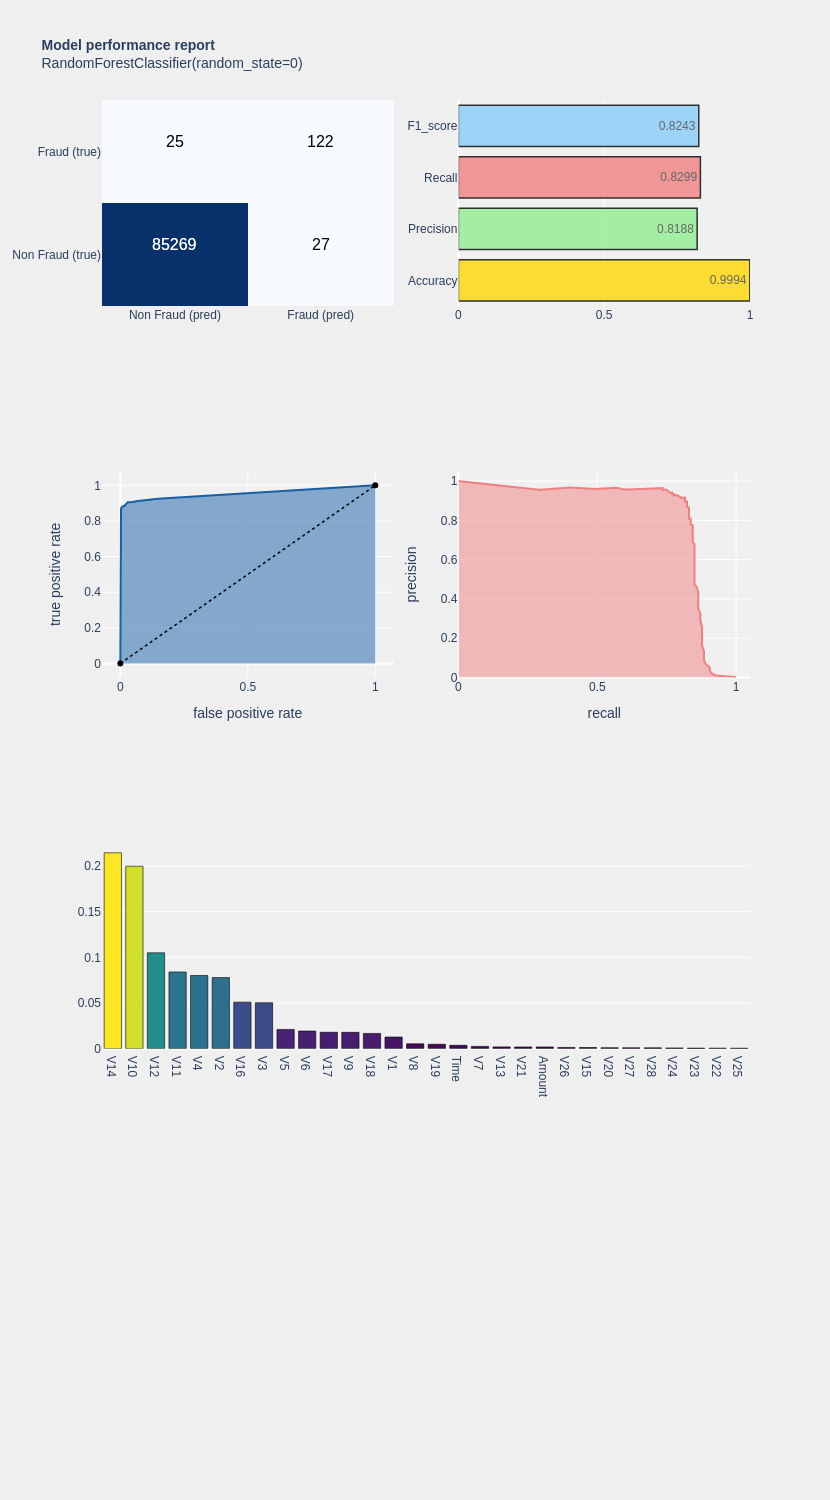

In [ ]:
model1, probabilities1, fig1 = run_sampling_fs_RF(X_combined_sampling, X_test, y_combined_sampling, y_test)

In [ ]:
model_result1 = cross_validation(model1, X_combined_sampling, y_combined_sampling)
print(model_result1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/prepr

{'Training Time': array([14.70574403, 25.50072575, 24.50947142, 35.45494342, 20.67203522,
       19.3458643 , 21.19496512, 21.34271312, 23.09294176, 19.55870295]), 'Mean Training Time': 22.537810707092284, 'Test Time': array([0.13302302, 0.36766052, 0.13886142, 0.11146569, 0.14194846,
       0.16873169, 0.11328363, 0.11240554, 0.10915995, 0.14824891]), 'Mean Test Time': 0.15447888374328614, 'Training Accuracy scores': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99996919, 0.99996919, 0.99996919, 0.9999692 ]), 'Mean Training Accuracy': 99.99876779952078, 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99990758, 0.99990758, 0.99990758, 0.99990759]), 'Mean Training Recall': 0.9999630322773836, 'Training F1 scores': array([1.        , 1.        , 1.        , 1.        , 1.  

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#MODEL 2: Cost-Sensitive Random Forest
def train_cost_sensitive_classifier(X,y,weights):
    start = time.time()
    model = RandomForestClassifier(random_state = 0, class_weight=weights)
    model = model.fit(X, y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    return model

In [ ]:
def run_CSRF(training_x, testing_x, training_y, testing_y):
    # Training Model
    model = train_cost_sensitive_classifier(training_x,training_y,{0:1, 1:0.1})
    start = time.time()
    # Prediksi
    predictions = model.predict(testing_x)
    # Probabilitas Prediksi
    probabilities = model.predict_proba(testing_x)
    stop = time.time()
    print(f"Testing time: {stop - start}s")

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)

    x = ["Non Fraud (pred)","Fraud (pred)"]
    y = ["Non Fraud (true)","Fraud (true)"]
    
    # Change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in conf_matrix]

    # Set up figure 
    fig1 = ff.create_annotated_heatmap(z=conf_matrix, x=x, y=y, annotation_text=z_text, colorscale='Blues')

    # Classification Report
    target_names = ['Non Fraud', 'Fraud']
    report = classification_report(testing_y, predictions, target_names=target_names, 
                                   digits=4)

    # Metrik    
    Accuracy  =  accuracy_score(testing_y, predictions)
    Precision =  precision_score(testing_y, predictions, labels=[1])
    Recall    =  recall_score(testing_y, predictions, labels=[1])
    F1_score  =  f1_score(testing_y, predictions, labels=[1])
    
    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    print('Model:', type(model).__name__)
    print('\n')
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    # ROC
    model_roc_auc = roc_auc_score(testing_y, probabilities[:,1])
    print("AUC Score:", model_roc_auc)
    model_gmean = geometric_mean_score(testing_y, predictions)
    print("G-Mean Score:", model_gmean)
    print("F1 Score:", F1_score)
    print('\n')
    print('Classification Report : \n', report)

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                    orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-Recall
    precision, recall, thresholds = precision_recall_curve(testing_y, probabilities[:,1])
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    # Feature Importance
    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data   = pd.DataFrame(training_x.columns.tolist())
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    
    # Subplots
    fig = make_subplots(rows=4, cols=2, print_grid=False, 
                        specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Feature importance',
                                        ))
    
    fig.append_trace(fig1.data[0],1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,3,1)
    
    annot1 = list(fig1.layout.annotations)

    # Add colorbar
    fig1['data'][0]['showscale'] = True
    fig.update_layout(annotations=annot1)
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    fig.show('png')
    return model, probabilities, fig

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
#      _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)]
      _scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1', 'roc_auc':'roc_auc', 'neg_mean_squared_error':'neg_mean_squared_error', 'neg_mean_absolute_error':'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)}
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Time": results['fit_time'],
              "Mean Training Time": results['fit_time'].mean(),
              "Test Time": results['score_time'],
              "Mean Test Time": results['score_time'].mean(),
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Training G-Mean Score": results['train_gmean'],
              "Mean Training G-Mean Score": results['train_gmean'].mean(),
              "Training AUC scores": results['train_roc_auc'],
              "Mean Training AUC Score": results['train_roc_auc'].mean(),
              "Training Mean Squared Error": results['train_neg_mean_squared_error'],
              "Mean Training MSE": results['train_neg_mean_squared_error'].mean(),
              "Training Mean Absolute Error": results['train_neg_mean_absolute_error'],
              "Mean Training MAE": results['train_neg_mean_absolute_error'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Validation AUC scores": results['test_roc_auc'],
              "Mean Validation AUC Score": results['test_roc_auc'].mean(),
              "Validation G-Mean Score": results['test_gmean'],
              "Mean Validation G-Mean Score": results['test_gmean'].mean(),
              "Validation Mean Squared Error": results['test_neg_mean_squared_error'],
              "Mean Validation MSE": results['test_neg_mean_squared_error'].mean(),
              "Validation Mean Absolute Error": results['test_neg_mean_absolute_error'],
              "Mean Validation MAE": results['test_neg_mean_absolute_error'].mean(),
              }

X_train shape = (199364, 30)
y_train shape = (199364,)
X_test shape = (85443, 30)
y_test shape = (85443,)


Training time: 292.60231041908264s
Testing time: 2.2448911666870117s
Model: RandomForestClassifier


Accuracy Score: 0.9995201479348805
AUC Score: 0.9438240358983585
G-Mean Score: 0.8805892732585618
F1 Score: 0.8475836431226766


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9996    0.9999    0.9998     85296
       Fraud     0.9344    0.7755    0.8476       147

    accuracy                         0.9995     85443
   macro avg     0.9670    0.8877    0.9237     85443
weighted avg     0.9995    0.9995    0.9995     85443



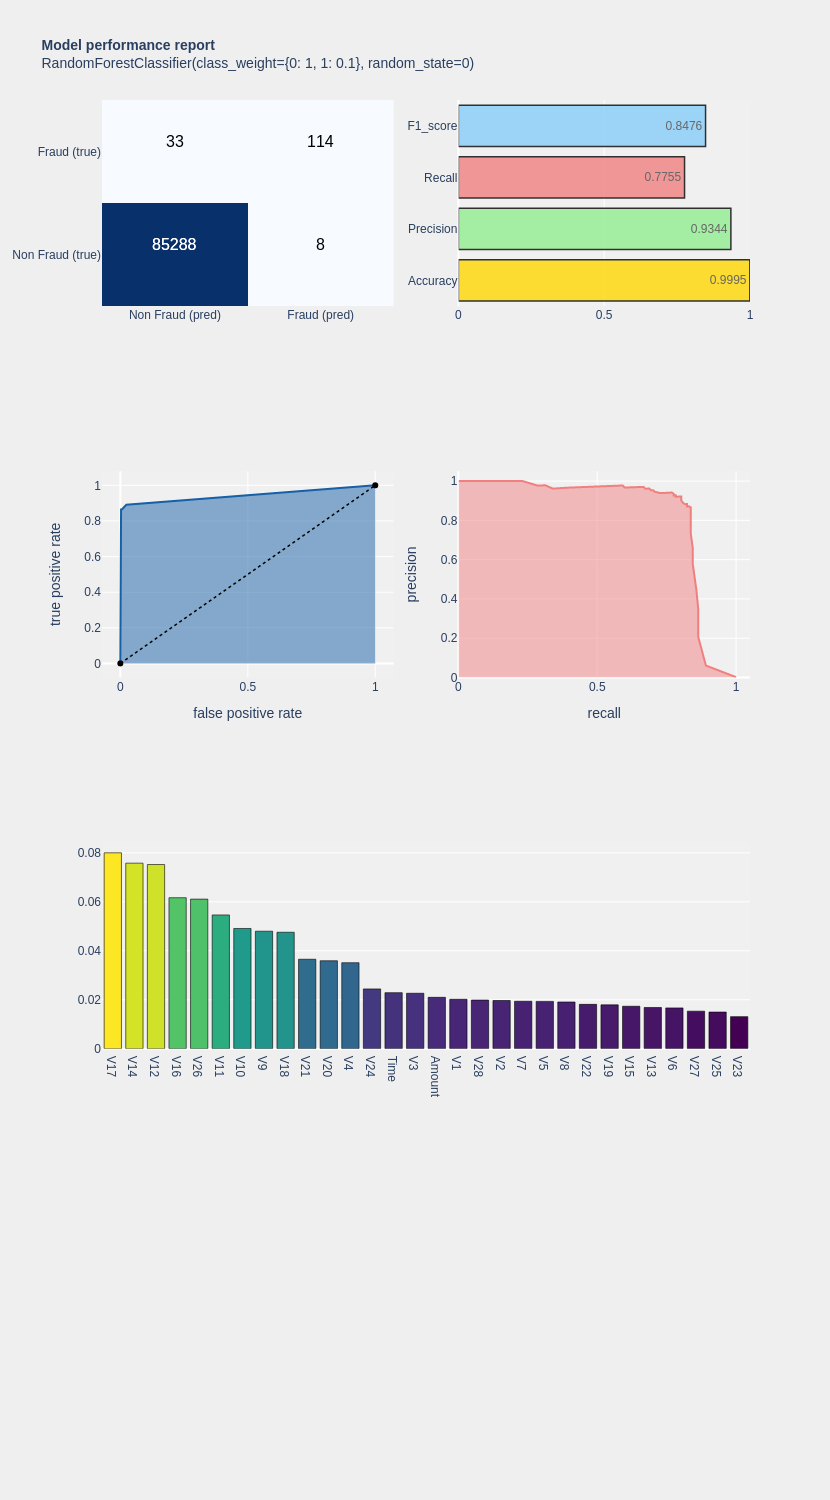

In [ ]:
#Menggunakan dataset yang belum diubah dengan sampling
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train shape =', X_train_v2.shape)
print('y_train shape =', y_train_v2.shape)
print('X_test shape =', X_test_v2.shape)
print('y_test shape =', y_test_v2.shape)
print('\n')

model2, probabilities2, fig2 = run_CSRF(X_train_v2, X_test_v2, y_train_v2, y_test_v2)

In [ ]:
model_result2 = cross_validation(model2, X, y)
print(model_result2)

{'Training Time': array([615.91677308, 561.46963453, 538.16744471, 548.36561036,
       530.81486297, 555.27886939, 535.00448084, 509.1181767 ,
       518.64030695, 509.8242681 ]), 'Mean Training Time': 542.2600427627564, 'Test Time': array([0.6898284 , 1.01681089, 1.03788161, 2.14708638, 0.99330688,
       0.9890089 , 1.00290895, 0.99235821, 0.97663569, 0.98297   ]), 'Mean Test Time': 1.0828795909881592, 'Training Accuracy scores': array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       0.9999961, 1.       , 1.       , 1.       ]), 'Mean Training Accuracy': 99.99996098718039, 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99773756, 1.        , 1.        , 1.        ]), 'Mean Training Recall': 0.9997737556561086, 'Training F1 scores': array([1.       , 1.       , 1.       , 1.       , 1. 

In [ ]:
# MODEL UTAMA: Oversampling, Undersampling, Feature Selection, Cost-Sensitive Random Forest

# Step 1: Tuning Hyperparameter 
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [25, 50, 75]
}

clf_rf = RandomForestClassifier(random_state = 0)

# Tuning Random Forest Menggunakan GridSearchCV
tuning_random_forest = GridSearchCV(clf_rf, param_grid, scoring = 'accuracy', 
                                    cv=10, n_jobs = -1, return_train_score=True)

# Fitting model
start = time.time()
tuning_random_forest = tuning_random_forest.fit(X_combined_sampling,y_combined_sampling)
stop = time.time()
print(f"Tuning time: {stop - start}s")
print('Best Parameters : ',tuning_random_forest.best_params_)

# Hasil Tuning
print("\nBest Model: %f using %s" % (tuning_random_forest.best_score_, 
tuning_random_forest.best_params_))
print('\n')
means = tuning_random_forest.cv_results_['mean_test_score']
stds = tuning_random_forest.cv_results_['std_test_score']
params = tuning_random_forest.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

In [ ]:
# Step 2: Tuning Weight Cost-Sensitive Learning
def find_best_weight_class_one(training_x, testing_x, training_y, testing_y):

    # Looping weight untuk mencari weight yang paling optimal
    for w in [0.005, 0.001, 0.01, 0.1, 1, 5, 10, 20, 25, 50]:
        print('---Weight {} (Fraud)---'.format(w))
        
        # Train Model
        clf = RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_leaf=4, 
                                     min_samples_split=8, n_estimators=50,
                                     random_state = 0, class_weight={1:w, 0:1})
        
        clf.fit(training_x, training_y) 
        # Prediksi
        predictions = clf.predict(testing_x)
        # Probabilitas Prediksi
        probabilities = clf.predict_proba(testing_x)

        # Metrik
        Accuracy  =  accuracy_score(testing_y, predictions)
        Precision =  precision_score(testing_y, predictions)
        Recall    =  recall_score(testing_y, predictions)
        F1_score  =  f1_score(testing_y, predictions)
        model_roc_auc = roc_auc_score(testing_y, probabilities[:,1])
        print(f'Accuracy Score: {Accuracy}')
        print(f'Area Under Curve: {model_roc_auc}')
        print(f'Precision score: {Precision}')
        print(f'Recall score: {Recall}')
        print(f'f1 score: {F1_score}')
        print('\n')

In [ ]:
print("\nWeight Optimal untuk Kelas Fraud")

start = time.time()
best_one = find_best_weight_class_one(X_combined_sampling, X_test, y_combined_sampling, y_test)
stop = time.time()
print(f"Weight Tuning time: {stop - start}s")


Weight Optimal untuk Kelas Fraud
---Weight 0.005 (Fraud)---


<ipython-input-49-1b885a9f18e5>:13: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ValueError: ignored

Weight 0.01 mendapatkan performa terbaik

In [ ]:
def train_tuning_cs_rf(X,y):

    model = RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_leaf=4, 
                                   min_samples_split=8, n_estimators=50,
                                   random_state = 0, class_weight={0:1, 1:0.01})
    start = time.time()
    model = model.fit(X, y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    return model

In [ ]:
X_fs = X_combined_sampling.drop(['V28'],axis=1)
X_test_fs = X_test.drop(['V28'], axis=1)

In [ ]:
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score as gmean

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
#      _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)]
      _scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1', 'roc_auc':'roc_auc', 'neg_mean_squared_error':'neg_mean_squared_error', 'neg_mean_absolute_error':'neg_mean_absolute_error', 'gmean':make_scorer(gmean, greater_is_better=True)}
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Time": results['fit_time'],
              "Mean Training Time": results['fit_time'].mean(),
              "Test Time": results['score_time'],
              "Mean Test Time": results['score_time'].mean(),
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Training G-Mean Score": results['train_gmean'],
              "Mean Training G-Mean Score": results['train_gmean'].mean(),
              "Training AUC scores": results['train_roc_auc'],
              "Mean Training AUC Score": results['train_roc_auc'].mean(),
              "Training Mean Squared Error": results['train_neg_mean_squared_error'],
              "Mean Training MSE": results['train_neg_mean_squared_error'].mean(),
              "Training Mean Absolute Error": results['train_neg_mean_absolute_error'],
              "Mean Training MAE": results['train_neg_mean_absolute_error'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Validation AUC scores": results['test_roc_auc'],
              "Mean Validation AUC Score": results['test_roc_auc'].mean(),
              "Validation G-Mean Score": results['test_gmean'],
              "Mean Validation G-Mean Score": results['test_gmean'].mean(),
              "Validation Mean Squared Error": results['test_neg_mean_squared_error'],
              "Mean Validation MSE": results['test_neg_mean_squared_error'].mean(),
              "Validation Mean Absolute Error": results['test_neg_mean_absolute_error'],
              "Mean Validation MAE": results['test_neg_mean_absolute_error'].mean(),
              }

In [ ]:
def run_tuning_sampling_fs_CSRF(training_x, testing_x, training_y, testing_y):
    # Training Model
    model = train_tuning_cs_rf(training_x,training_y)
    
    # Prediksi
    start = time.time()
    predictions = model.predict(testing_x)
    # Probabilitas Prediksi
    probabilities = model.predict_proba(testing_x)
    stop = time.time()
    print(f"Testing time: {stop - start}s")

    # Confusion Matrix
    conf_matrix = confusion_matrix(testing_y, predictions)

    x = ["Non Fraud (pred)","Fraud (pred)"]
    y = ["Non Fraud (true)","Fraud (true)"]

    # Change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in conf_matrix]

    # Set up figure 
    fig1 = ff.create_annotated_heatmap(z=conf_matrix, x=x, y=y, annotation_text=z_text, colorscale='Blues')

    # Classification Report
    target_names = ['Non Fraud', 'Fraud']
    report = classification_report(testing_y, predictions, target_names=target_names, 
                                   digits=4)

    # Metrik    
    Accuracy  =  accuracy_score(testing_y, predictions)
    Precision =  precision_score(testing_y, predictions, labels=[1])
    Recall    =  recall_score(testing_y, predictions, labels=[1])
    F1_score  =  f1_score(testing_y, predictions, labels=[1])

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    print('Model:', type(model).__name__)
    print('\n')
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    # Kurva Roc
    model_roc_auc = roc_auc_score(testing_y, probabilities[:,1])
    print("AUC Score:", model_roc_auc)
    model_gmean = geometric_mean_score(testing_y, predictions)
    print("G-Mean Score:", model_gmean)
    print("F1 Score:", F1_score)
    print('\n')
    print('Classification Report : \n', report)

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                    orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Kurva Precision-Recall
    precision, recall, thresholds = precision_recall_curve(testing_y, probabilities[:,1])
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    # Feature Importance
    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data   = pd.DataFrame(training_x.columns.tolist())
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    
    # Subplots
    fig = make_subplots(rows=4, cols=2, print_grid=False, 
                        specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Feature importance',
                                        ))
    
    fig.append_trace(fig1.data[0],1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,3,1)
    
    annot1 = list(fig1.layout.annotations)

    # Add colorbar
    fig1['data'][0]['showscale'] = True
    fig.update_layout(annotations=annot1)
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 1200,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    fig.show('png')
    return model, probabilities, fig

In [ ]:
#Model Utama dengan feature selection
model = RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_leaf=4, 
                               min_samples_split=8, n_estimators=50,
                               random_state = 0, class_weight={1:1, 0:0.01})
model_result = cross_validation(model, X_fs, y_combined_sampling)
print(model_result)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/prepr

{'Training Time': array([9.73908424, 8.97193027, 9.14336038, 9.1464808 , 9.38268852,
       9.19741511, 9.17966652, 9.09767413, 9.00361037, 9.07389331]), 'Mean Training Time': 9.193580365180969, 'Test Time': array([0.09228492, 0.09070945, 0.09104252, 0.09283018, 0.09085488,
       0.09380889, 0.09254789, 0.09163904, 0.0902276 , 0.08904028]), 'Mean Test Time': 0.09149856567382812, 'Training Accuracy scores': array([0.99969195, 0.99956873, 0.99956873, 0.99956873, 0.99953792,
       0.99953792, 0.99953792, 0.99959953, 0.99963034, 0.99963035]), 'Mean Training Accuracy': 99.95872107992471, 'Training Precision scores': array([0.99907672, 0.99889207, 0.99889207, 0.99889207, 0.99879985,
       0.99870777, 0.99879974, 0.99889207, 0.99889217, 0.99889227]), 'Mean Training Precision': 0.9988736811015941, 'Training Recall scores': array([1.        , 0.99981517, 0.99981517, 0.99981517, 0.99981517,
       0.99990759, 0.99981516, 0.99990758, 1.        , 1.        ]), 'Mean Training Recall': 0.99988910

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training time: 3.6373305320739746s
Testing time: 1.7581465244293213s
Model: RandomForestClassifier


Accuracy Score: 0.9992726907932686
AUC Score: 0.9590439580873431
G-Mean Score: 0.9064256277171894
F1 Score: 0.7925608011444922


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9997    0.9996    0.9996    199028
       Fraud     0.7652    0.8220    0.7926       337

    accuracy                         0.9993    199365
   macro avg     0.8824    0.9108    0.8961    199365
weighted avg     0.9993    0.9993    0.9993    199365



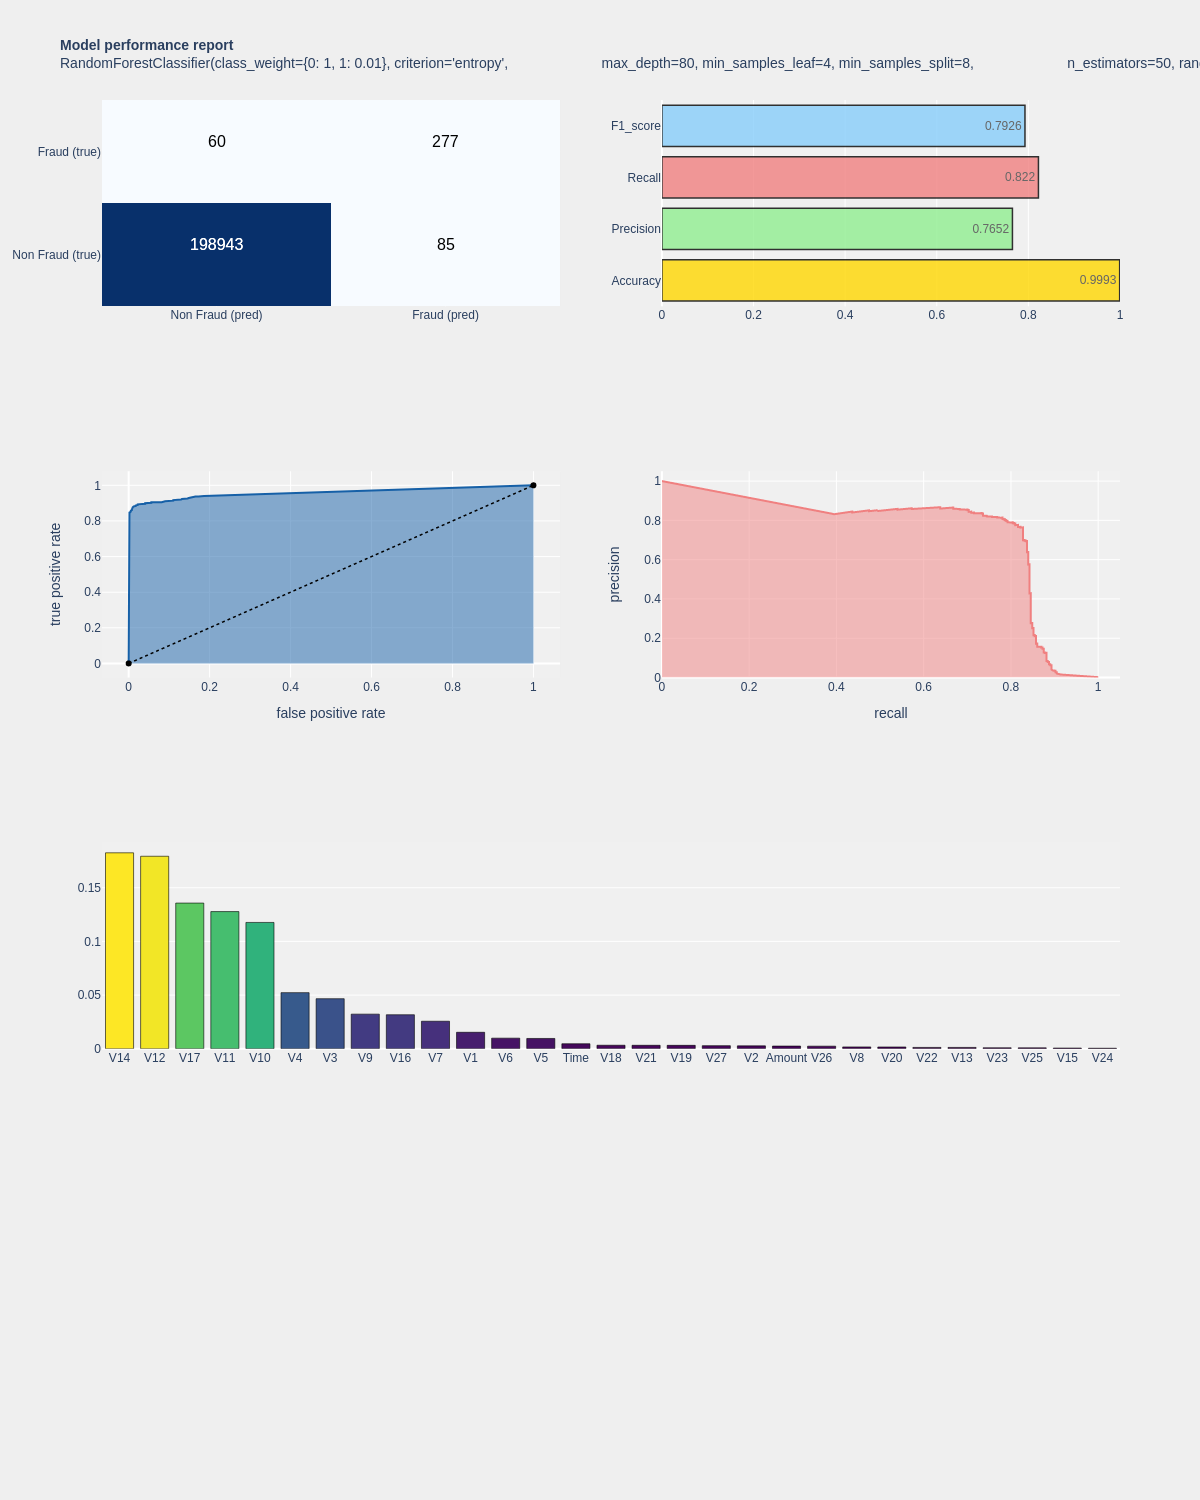

In [ ]:
model3, probabilities3, fig3 = run_tuning_sampling_fs_CSRF(X_fs, X_test_fs, y_combined_sampling, y_test)

In [ ]:
#Model Utama tanpa feature selection
model = RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_leaf=4, 
                               min_samples_split=8, n_estimators=50,
                               random_state = 0, class_weight={1:1, 0:0.01})
model_result = cross_validation(model, X_combined_sampling, y_combined_sampling)
print(model_result)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/prepr

{'Training Time': array([11.43927908,  9.14545965,  9.16403055,  9.15838599,  9.18918109,
        9.10856438,  9.21869612,  9.03462005,  8.98981977,  9.17770457]), 'Mean Training Time': 9.362574124336243, 'Test Time': array([0.08771396, 0.09160423, 0.08992338, 0.09416509, 0.09181428,
       0.09353018, 0.09181976, 0.09369349, 0.1008203 , 0.09238172]), 'Mean Test Time': 0.09274663925170898, 'Training Accuracy scores': array([0.99969195, 0.99956873, 0.99959953, 0.99956873, 0.99956873,
       0.99953792, 0.99947631, 0.99956873, 0.99963034, 0.99959954]), 'Mean Training Accuracy': 99.95810498442977, 'Training Precision scores': array([0.99907672, 0.99889207, 0.99889217, 0.99889207, 0.99889207,
       0.99879985, 0.99861534, 0.99898412, 0.9989843 , 0.9989843 ]), 'Mean Training Precision': 0.9989013018026391, 'Training Recall scores': array([1.        , 0.99981517, 0.99990759, 0.99981517, 0.99981517,
       0.99981517, 0.99981516, 0.99972274, 0.99990758, 0.99981517]), 'Mean Training Recall': 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<ipython-input-36-73730ebf2bb2>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training time: 8.36420464515686s
Testing time: 1.1201207637786865s
Model: RandomForestClassifier


Accuracy Score: 0.9994616293903538
AUC Score: 0.9666972843348557
G-Mean Score: 0.9146140600248759
F1 Score: 0.8424657534246576


Classification Report : 
               precision    recall  f1-score   support

   Non Fraud     0.9997    0.9997    0.9997     85296
       Fraud     0.8483    0.8367    0.8425       147

    accuracy                         0.9995     85443
   macro avg     0.9240    0.9182    0.9211     85443
weighted avg     0.9995    0.9995    0.9995     85443



/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



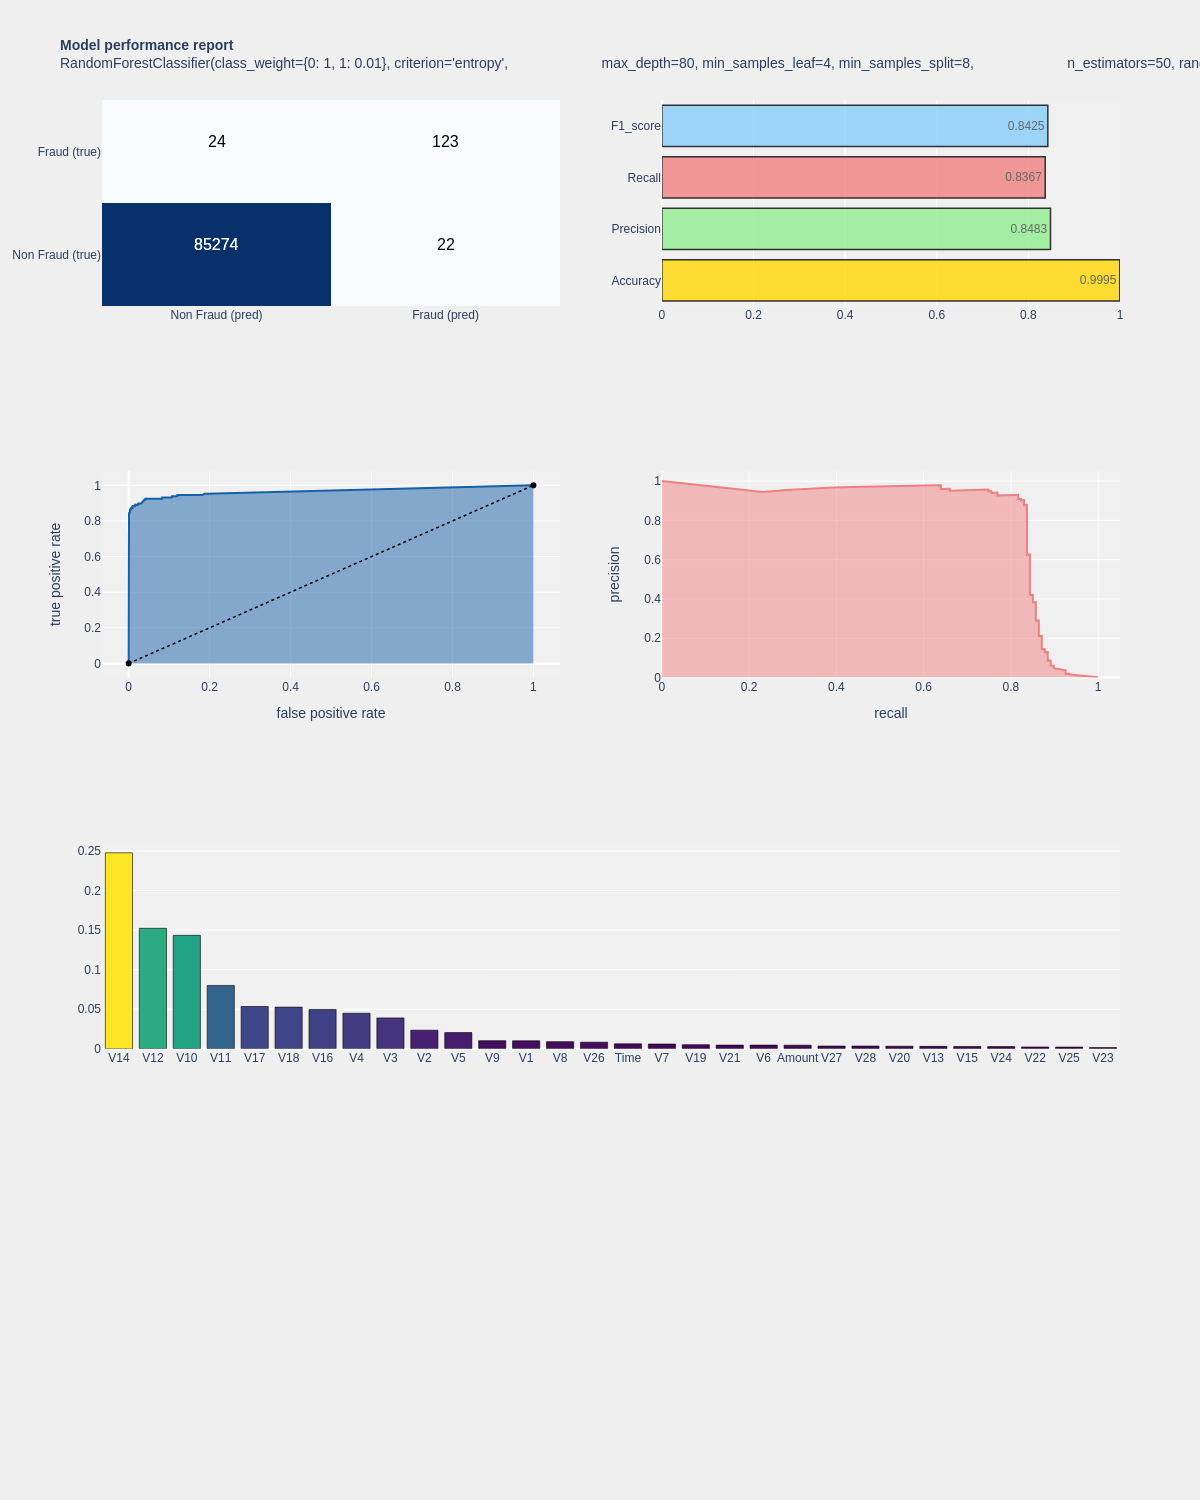

In [ ]:
#MODEL UTAMA TANPA FEATURE SELECTION
model4, probabilities4, fig4 = run_tuning_sampling_fs_CSRF(X_combined_sampling, X_test, y_combined_sampling, y_test)